# Analyzing "7363" Data (Reference Code)
Author: Nicholas Goldsmith <br>
Start Date: 20 December 2022 <br>
Last Updated: 20 December 2022

## Purpose
This is a Jupyter notebook with some basic analysis of public US government data. I am making this analysis as a means of keeping track of some common functions that I use in Python scripting. In other words, this is personal reference code and the analysis is intended for me to reference functions I am used to using. The point of this script is NOT to make a meaningful analysis of the utilized data. I would recommend https://beta.nsf.gov/about/about-nsf-by-the-numbers if you are interested in more informative analyses.
<br><br> 
Disclaimer: The contents of this document do not necessarily represent the views of my employer nor the views of any organization I may be associated with. The contents of this document are meant to serve as a reference for me of Python functions and code chunks I want to remember, and potentially to be utilized as a way to add to my individual Python repetoire (eg. asking others how they might crunch a certain bit of data).

## Libraries

In [1]:
import pandas # The pandas package allows me to read in a csv and manipulate it as a dataframe
import matplotlib.pyplot as plt # Package to help with some of the graphing.

## Data
I am using publically available data. Using the public NSF Award Search (https://nsf.gov/awardsearch/advancedSearch.jsp), I've searched Element Code "7363" and included all active and expired awards. There are 2573 awards in the dataset.

In [2]:
Awards = pandas.read_excel("Awards-2022-12-20.xls") # Reads in the data file

In [3]:
Awards.info() # Gives the structure of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   AwardNumber              2573 non-null   int64 
 1   Title                    2573 non-null   object
 2   NSFOrganization          2573 non-null   object
 3   Program(s)               2573 non-null   object
 4   StartDate                2573 non-null   object
 5   LastAmendmentDate        2573 non-null   object
 6   PrincipalInvestigator    2568 non-null   object
 7   State                    2573 non-null   object
 8   Organization             2573 non-null   object
 9   AwardInstrument          2573 non-null   object
 10  ProgramManager           2573 non-null   object
 11  EndDate                  2573 non-null   object
 12  AwardedAmountToDate      2573 non-null   object
 13  Co-PIName(s)             773 non-null    object
 14  PIEmailAddress           2568 non-null  

### Data Quality Control

In [4]:
# ARRAAmount appears to be stored as text rather than a number
Awards["ARRAAmount"]

0             $0.00
1             $0.00
2             $0.00
3             $0.00
4             $0.00
           ...     
2568          $0.00
2569          $0.00
2570          $0.00
2571          $0.00
2572    $150,000.00
Name: ARRAAmount, Length: 2573, dtype: object

In [5]:
# To fix this I will first need to remove the dollar signs
Awards["ARRAAmount"] = Awards["ARRAAmount"].replace('\$|,', '', regex=True)
Awards["ARRAAmount"]

0            0.00
1            0.00
2            0.00
3            0.00
4            0.00
          ...    
2568         0.00
2569         0.00
2570         0.00
2571         0.00
2572    150000.00
Name: ARRAAmount, Length: 2573, dtype: object

In [6]:
# Now I can convert it to a float
Awards["ARRAAmount"] = pandas.to_numeric(Awards["ARRAAmount"])
Awards["ARRAAmount"]

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
          ...   
2568         0.0
2569         0.0
2570         0.0
2571         0.0
2572    150000.0
Name: ARRAAmount, Length: 2573, dtype: float64

## ARRA
First I want to make a subset for only those awards with ARRA funding, and then I can look at it some more

In [7]:
ARRA = Awards[Awards["ARRAAmount"] > 0] # Subsets all those where ARRA Amount is more than 0
ARRA = ARRA.reset_index() # resets the index of the dataframe, which is useful if one wants to for-loop through it

In [8]:
len(ARRA['ARRAAmount']) # number of ARRA Awards

70

In [9]:
ARRA['ARRAAmount'].sum() # Total amount of ARRA Awards

23983399.0

In [10]:
ARRA['ARRAAmount'].mean() # Mean amount of ARRA funds used for ARRA awards

342619.9857142857

([], [])

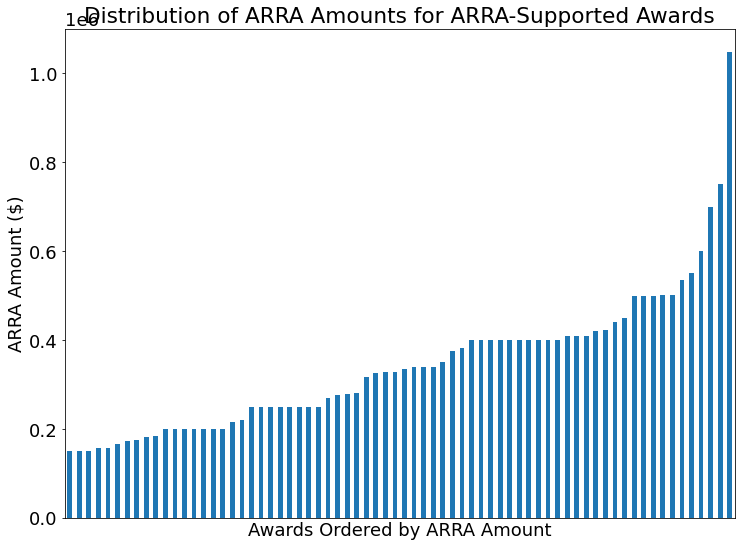

In [11]:
# Code to make a plot bigger
plt.rcParams["figure.figsize"] = 12, 9 # Makes the plot bigger
plt.rcParams.update({'font.size' : 18}) # Makes the plot text bigger

# Plot
# Makes a bar plot of the ARRA amounts with the data sorted by size
ARRA['ARRAAmount'].sort_values().plot.bar(use_index=False) 
plt.title("Distribution of ARRA Amounts for ARRA-Supported Awards")
plt.xlabel('Awards Ordered by ARRA Amount')
plt.ylabel('ARRA Amount ($)')
plt.xticks([],[])

## States

In [12]:
Awards.groupby('State')['AwardNumber'].nunique() # Returns the number of unique Awards by State

State
AL     18
AR      2
AZ     58
CA    390
CO     48
CT     36
DC     33
DE      8
FL     79
GA     75
HI      3
IA     23
ID      1
IL    118
IN     63
KS     20
KY      9
LA     10
MA    239
MD     39
MI     70
MN     30
MO     38
MS      5
MT      8
NC     80
ND      2
NE     19
NH      7
NJ    124
NM     11
NV      7
NY    191
OH     66
OK      6
OR     27
PA    165
PR      1
RI     11
SC     20
SD      4
TN     30
TX    168
UT     16
VA     98
VT      1
WA     43
WI     53
Name: AwardNumber, dtype: int64

## Directorate and Program Element Code(s)
This one is mostly just to show grouping by multiple things at once

In [13]:
Awards.groupby(['NSFDirectorate','ProgramElementCode(s)'])['AwardNumber'].nunique()

NSFDirectorate  ProgramElementCode(s)                   
CSE             005Y, 033Y, 7363                            1
                018Y, 1640, 7363                            1
                024F, 1688, 7363                            1
                024F, 7363                                  2
                024F, 7363, 7917                            1
                                                           ..
MPS             7363, 7564, 7976                            1
O/D             1253, 7299, 7363                            2
                7299, 7363                                  1
SBE             1372, 7363                                  1
                1640, 1714, 7354, 7363, 7603, 8060, 8078    1
Name: AwardNumber, Length: 159, dtype: int64

## CAREER vs Non-CAREER by Year

### Adding a Year Column

In [14]:
Awards['Year'] = 0 # Creating a year column with all 0's

# The below uses a for loop to go through every row. It takes the last four characters of
# Start Date and calls them the year
for i in range(0, len(Awards['AwardNumber'])):
    Awards['Year'].at[i] = int(Awards['StartDate'][i][len(Awards['StartDate'][i])-4:])

### Marking which awards are CAREERs

In [15]:
# NSF Awards often have program information in the title
# CAREER Awards /should/ have CAREER in their title
# So I will make a substring to check if it is in the title
substring = 'CAREER'
# I'll create an empty array to add the information to
IsCAREER = []

for row in Awards['Title']: # Going through every Title
    rowAllCaps = row.upper() # Make it all caps to capitalization doesn't affect equality
    placeholder = False
    if substring in rowAllCaps: # Check if the substring is in the Title
        placeholder = True
    IsCAREER.append(placeholder) # Add the result to the array

Awards['IsCAREER'] = IsCAREER # Make the array a column in the dataframe

### Plotting CAREER vs non-CAREER by Year

Text(0, 0.5, 'Number of Awards')

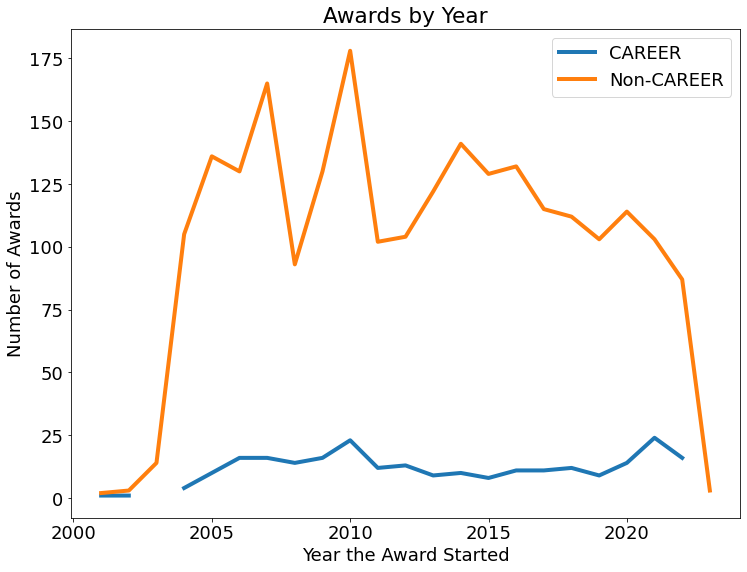

In [16]:
# First we need the data of CAREERs and non-CAREERs by Year
AwardsCAREER = Awards[Awards['IsCAREER']] # Subsetting the CAREERS
CAREERAwardsByYear = AwardsCAREER.groupby('Year')['AwardNumber'].nunique()

AwardsNotCAREER = Awards[Awards['IsCAREER']==False]
NotCAREERAwardsByYear = AwardsNotCAREER.groupby('Year')['AwardNumber'].nunique()

# Now make one dataset to plot from
AwardsByYear = pandas.DataFrame({'CAREER' : CAREERAwardsByYear,
                                'Non-CAREER' : NotCAREERAwardsByYear})

# Code to make a plot bigger
plt.rcParams["figure.figsize"] = 12, 9 # Makes the plot bigger
plt.rcParams.update({'font.size' : 18}) # Makes the plot text bigger

# Plot
AwardsByYear.plot.line(lw=4)
plt.title("Awards by Year")
plt.xlabel("Year the Award Started")
plt.ylabel("Number of Awards")

### Checking Institutions that got an award but not a CAREER

In [17]:
# The code below looks at which organizations are represented in the list of all awards
# but NOT in the list of just CAREER awards
list(set(Awards['Organization']) - set(AwardsCAREER['Organization']))

['California State University-Dominguez Hills Foundation',
 'Franklin W. Olin College of Engineering',
 'University of Houston - Clear Lake',
 'University of Minnesota Duluth',
 'University of Massachusetts Boston',
 'Bucknell University',
 'University Enterprises, Incorporated',
 'San Diego State University Foundation',
 'Florida Atlantic University',
 'BBN Systems & Technologies Corporation',
 'Saint Louis University',
 'Corporation for Education Network Initiatives in California',
 'Chicago Zoological Society',
 'Electrical and Computer Engineering Department Heads Association',
 'Research Foundation Of The City University Of New York (Lehman)',
 'University of Missouri-Kansas City',
 'University of Mississippi',
 'Texas Tech University',
 'University of Colorado at Denver-Downtown Campus',
 'Henry M Jackson Fdn for Advmt of Military Medicine',
 'Institute of Electrical & Electronics Engineers, Inc.',
 'South Dakota State University',
 'College of William and Mary',
 'Texas A&M Univ